#Theoretical

#1. What is a Support Vector Machine (SVM) ?

- A Support Vector Machine (SVM) is a supervised machine learning algorithm used mainly for classification tasks, and sometimes for regression. It works by finding the optimal hyperplane that separates data points of different classes with the maximum margin.

 The hyperplane is essentially a decision boundary. In two dimensions, it's a line; in three dimensions, it's a plane; in higher dimensions, it's called a hyperplane. The support vectors are the data points that lie closest to the hyperplane. These points influence the position and orientation of the hyperplane and are critical in defining the decision boundary.

 SVM aims to maximize the margin, which is the distance between the hyperplane and the nearest support vectors. A larger margin generally means better generalization to unseen data.

 There are two main types of SVM: linear and non-linear. Linear SVM works well when data is linearly separable. For non-linear data, SVM uses kernel functions (such as polynomial or radial basis function kernels) to map the data into a higher-dimensional space where a separating hyperplane can be found.

 An example application of SVM is in email classification, where it can be used to distinguish between spam and non-spam emails based on various features.

----

#2. What is the difference between Hard Margin and Soft Margin SVM ?

- The difference between **Hard Margin** and **Soft Margin** SVM lies in how strictly the model separates the data:

### Hard Margin SVM:

* Assumes the data is **perfectly linearly separable**.
* Finds a hyperplane that **strictly separates** the classes **without any misclassification**.
* **No tolerance** for errors or noise.
* Risk: If the data has even slight overlap or outliers, hard margin SVM may **fail or overfit**.

### Soft Margin SVM:

* Allows for **some misclassification or overlap**.
* Introduces a **penalty** for errors using a parameter called **C**.
* **Balances** between maximizing the margin and minimizing classification errors.
* More **robust** in real-world situations with **noise or overlapping classes**.

In short:

* **Hard Margin**: Strict, no errors allowed.
* **Soft Margin**: Flexible, allows some errors for better generalization.

----

#3. What is the mathematical intuition behind SVM ?

- The mathematical intuition behind SVM is based on **maximizing the margin** between two classes by finding the optimal hyperplane. Here’s a step-by-step breakdown:

 ### 1. **Hyperplane Equation**

 In an n-dimensional space, a hyperplane can be written as:

 $$
 \mathbf{w}^T \mathbf{x} + b = 0
 $$

 * $\mathbf{w}$ is the **weight vector** (normal to the hyperplane).
 * $\mathbf{x}$ is the input feature vector.
 * $b$ is the **bias** or intercept.

 ### 2. **Classification Rule**

 We assign a label based on the sign of the hyperplane:

 $$
 \text{Predicted class} = \text{sign}(\mathbf{w}^T \mathbf{x} + b)
 $$

 ### 3. **Margin**

 The **margin** is the distance between the hyperplane and the closest data points (support vectors).
 For a point $\mathbf{x}_i$, the distance to the hyperplane is:

 $$
 \frac{|\mathbf{w}^T \mathbf{x}_i + b|}{\|\mathbf{w}\|}
 $$

 ### 4. **Optimization Objective**

 SVM aims to **maximize the margin**, which is equivalent to **minimizing** $\|\mathbf{w}\|^2$ while ensuring all points are correctly classified:

 $$
 \min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2
 $$

 Subject to:

 $$
 y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 \quad \forall i
 $$

 Here, $y_i \in \{-1, 1\}$ are the class labels.

 ### 5. **Soft Margin (with slack variables)**

 For non-separable data, we introduce **slack variables** $\xi_i$ and a penalty parameter **C**:

 $$
 \min_{\mathbf{w}, b, \xi} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i
 $$

 Subject to:

 $$
 y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
 $$

 ### 6. **Dual Form & Kernels**

 SVM is often solved in its **dual form**, which makes it efficient and allows the use of **kernels**:

 $$
 K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
 $$

 This enables SVM to work in high-dimensional (even infinite) spaces without computing $\phi(x)$ explicitly.

----

#4. What is the role of Lagrange Multipliers in SVM ?

- The **Lagrange multipliers** play a central role in solving the **optimization problem** of SVM using the **dual formulation**. They allow us to convert a constrained optimization problem into a form that can be more efficiently solved, especially when using **kernel functions**.

 ### Here's the intuition:

 #### 1. **Original (Primal) Problem:**

 We want to **maximize the margin** while ensuring correct classification:

 $$
 \min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2 \quad \text{subject to } y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1
 $$

 #### 2. **Introduce Lagrange Multipliers:**

 We use a **Lagrangian function** to combine the objective and constraints using multipliers $\alpha_i \geq 0$ for each data point:

 $$
 L(\mathbf{w}, b, \alpha) = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_{i=1}^n \alpha_i \left[y_i (\mathbf{w}^T \mathbf{x}_i + b) - 1 \right]
 $$

 #### 3. **Dual Problem:**

 We take the **partial derivatives** of $L$ with respect to $\mathbf{w}$ and $b$, set them to zero, and substitute back into $L$. This gives us the **dual problem**:

 $$
 \max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j
 $$

 Subject to:

 $$
 \sum_{i=1}^n \alpha_i y_i = 0, \quad \alpha_i \geq 0
 $$

 This dual form depends **only on dot products** between training vectors, which allows us to introduce **kernel functions** for non-linear SVM.

 #### 4. **Support Vectors and α**

 * Only a few $\alpha_i$ will be **non-zero**.
 * The corresponding $\mathbf{x}_i$ are the **support vectors**.
 * The **weights $\mathbf{w}$** can be written as a weighted combination:

 $$
 \mathbf{w} = \sum_{i} \alpha_i y_i \mathbf{x}_i
 $$

 ### Summary:

 * **Lagrange multipliers $\alpha_i$** enforce constraints in SVM.
 * They help move from the **primal** to the **dual** problem.
 * The **non-zero $\alpha_i$** identify the **support vectors**.
 * They allow SVM to use the **kernel trick** efficiently.

----

#5. What are Support Vectors in SVM ?

- **Support Vectors** are the **critical data points** in a Support Vector Machine (SVM) that lie **closest to the decision boundary (hyperplane)**. These points are the most **informative** because they directly influence the **position and orientation** of the hyperplane.

### Key Characteristics:

1. **Closest to the Margin**:
   Support vectors are the data points that **lie on or inside the margin boundaries**. They are the **tightest constraints** in the optimization problem.

2. **Non-zero Lagrange Multipliers**:
   Only the support vectors have **non-zero** Lagrange multipliers $\alpha_i$. These points alone determine the **decision function**.

3. **Define the Optimal Hyperplane**:
   The SVM decision boundary is calculated using only these vectors:

   $$
   \mathbf{w} = \sum_i \alpha_i y_i \mathbf{x}_i
   $$

   where $\mathbf{x}_i$ are support vectors.

4. **Generalization Power**:
   Removing non-support vectors doesn’t affect the model. But removing even **one support vector** can change the decision boundary.

5. **Support Vectors in Non-linear SVM**:
   Even in higher-dimensional space (with kernel functions), the concept remains the same: **they’re the data points that matter most** for separating classes.

### Example:

Imagine you're trying to separate two classes (say cats and dogs) with a line. Most of the data points are far from the line, but a few are very close to it. These closest ones are the **support vectors** — they “support” the boundary you draw.

---

#6. What is a Support Vector Classifier (SVC) ?

- A **Support Vector Classifier (SVC)** is the **implementation of the Support Vector Machine (SVM)** algorithm specifically designed for **classification tasks**.

### In essence:

* SVC is a **classifier** that finds the **optimal hyperplane** to separate data points of different classes with the **maximum margin**.
* It’s the practical tool you use when you want to apply SVM for classification.

### Core Idea:

Given labeled training data, SVC learns a decision boundary that separates the classes as cleanly as possible, while allowing for some misclassification in the case of **soft margin SVM**.

### Key Elements:

1. **Input**: Feature vectors and class labels (e.g., cats vs dogs).
2. **Output**: A decision boundary that classifies new data points into one of the classes.
3. **Kernel Trick**: SVC can handle **non-linear** classification by using kernel functions (like **RBF**, **polynomial**, etc.) to project data into higher-dimensional space.

### Mathematically:

It solves the optimization problem of SVM with respect to classification, using support vectors and margins to find the best hyperplane:

$$
f(x) = \text{sign} \left( \sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b \right)
$$

### In Practice (e.g., with Scikit-learn in Python):

```python
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
```

### Summary:

* **SVC = SVM for classification**.
* It’s the classifier that uses the principles of margin maximization and support vectors.
* In code, `SVC` is the class you use from libraries like `scikit-learn` to build and train an SVM classifier.
----

#7. What is a Support Vector Regressor (SVR) ?

- A **Support Vector Regressor (SVR)** is the regression counterpart of Support Vector Machine (SVM). While SVM is used for classification tasks, SVR is used to predict **continuous numerical values**, which makes it particularly useful for analytical roles like those in data science or business analytics.

SVR tries to find a function that approximates the target values with a **margin of tolerance**, denoted by epsilon (ε). It doesn't aim to pass exactly through every data point but instead tries to keep most of them within a defined **ε-insensitive zone** around the regression function.

The goal of SVR is to find a function $f(x) = \mathbf{w}^T \mathbf{x} + b$ that is as **flat** as possible and predicts within an acceptable error margin. Any data point lying within this ε-margin is **not penalized**, while those outside are penalized using **slack variables**. This helps SVR handle **outliers and noise** effectively.

The **optimization objective** is:

$$
\min \left( \frac{1}{2} \|\mathbf{w}\|^2 + C \sum (\xi_i + \xi_i^*) \right)
$$

Subject to:

$$
y_i - \mathbf{w}^T \mathbf{x}_i - b \leq \epsilon + \xi_i \\
\mathbf{w}^T \mathbf{x}_i + b - y_i \leq \epsilon + \xi_i^*
$$

Here, $C$ controls the trade-off between the model complexity and how much deviation larger than ε is allowed.

Just like in classification SVM, SVR uses **support vectors**, but in this case, they are the data points that lie **outside the ε-margin**—these are the only points that influence the model.

SVR can also handle **non-linear regression** by applying **kernel functions** (like RBF, polynomial, etc.), enabling it to model complex relationships in the data.

For example, if you're working on a project predicting sales or customer churn trends, SVR can help you generate robust predictions without overfitting to noisy data.

---


#8. What is the Kernel Trick in SVM ?

- The **Kernel Trick** is a technique used in Support Vector Machines (SVM) to transform data into a higher-dimensional space where a linear decision boundary can be found, even if the data is not linearly separable in its original space. It enables SVM to handle **non-linear relationships** between data points, without explicitly calculating the transformation into the higher-dimensional space.

### Intuition Behind the Kernel Trick:

1. **Non-Linearly Separable Data**:
   If data points in the original feature space are not linearly separable, SVM would struggle to find a decision boundary. The idea of the kernel trick is to map the data into a higher-dimensional space where a linear boundary could exist to separate the data.

2. **Mapping to a Higher Dimension**:
   We use a **non-linear mapping function** $\phi(\mathbf{x})$ to transform the original input space $\mathcal{X}$ into a higher-dimensional feature space $\mathcal{F}$, which makes the data linearly separable.

3. **The Magic of the Kernel Trick**:
   Rather than explicitly computing the mapping $\phi(\mathbf{x})$, which could be computationally expensive, the kernel function computes the **dot product** between the transformed points directly in the higher-dimensional space.

   The kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ computes the inner product $\phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)$ without needing to compute the transformation explicitly:

   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)
   $$

   This is computationally efficient and allows SVM to work in high-dimensional spaces without the burden of high-dimensional computations.

### Common Kernel Functions:

1. **Linear Kernel**:
   When the data is already linearly separable, you can use a linear kernel, which is equivalent to the **dot product**:

   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j
   $$

2. **Polynomial Kernel**:
   This kernel transforms the data using polynomial features. It is defined as:

   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i^T \mathbf{x}_j + c)^d
   $$

   where $c$ is a constant and $d$ is the degree of the polynomial.

3. **Radial Basis Function (RBF) Kernel (Gaussian Kernel)**:
   One of the most commonly used kernels. It maps the data into a very high-dimensional space and is defined as:

   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \exp \left( -\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{2\sigma^2} \right)
   $$

   where $\sigma$ is a free parameter (bandwidth) controlling the shape of the kernel.

4. **Sigmoid Kernel**:
   This kernel is based on the **sigmoid function** and is used less frequently but can be useful in certain situations:

   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\alpha \mathbf{x}_i^T \mathbf{x}_j + c)
   $$

   where $\alpha$ and $c$ are parameters.

### Why is the Kernel Trick Useful?

* **Computational Efficiency**:
  It allows us to compute the dot product in the higher-dimensional space without explicitly transforming the data, which is computationally expensive.

* **Handling Non-Linearity**:
  It allows SVM to handle **non-linearly separable data** and to find decision boundaries that wouldn't be possible in the original space.

* **Flexibility**:
  Different kernel functions provide different ways to transform the data, giving SVM the flexibility to solve a wide range of problems.

### Example:

If you have a set of data that isn't linearly separable (for example, points in the shape of a circle), the **RBF kernel** can map the data to a higher-dimensional space where the data points become linearly separable. This way, SVM can find a hyperplane that separates the classes in this new space.

-----

#9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

- Here's a concise comparison of the **Linear Kernel**, **Polynomial Kernel**, and **RBF Kernel**:

### 1. **Linear Kernel**

* **When to Use**: Linearly separable data.
* **Advantages**: Fast, computationally efficient.
* **Disadvantages**: Only works with linearly separable data.

### 2. **Polynomial Kernel**

* **When to Use**: Moderately non-linear data, polynomial relationships.
* **Advantages**: Captures polynomial relationships.
* **Disadvantages**: Risk of overfitting, computationally expensive with high-degree polynomials.

### 3. **RBF Kernel**

* **When to Use**: Non-linearly separable data, complex relationships.
* **Advantages**: Highly flexible, handles complex data well.
* **Disadvantages**: Computationally intensive, sensitive to $\sigma$ parameter.

### Summary:

* **Linear Kernel**: Best for simple, linearly separable data.
* **Polynomial Kernel**: For moderate complexity, with polynomial relationships.
* **RBF Kernel**: Best for complex, non-linear problems.

---

#10. What is the effect of the C parameter in SVM ?

- The **C parameter** in Support Vector Machines (SVM) controls the trade-off between achieving a **low error on the training data** and ensuring that the model has a **wide margin** (generalization).

### Effect of C Parameter:

1. **Large C** (High value):

   * **Less margin, fewer misclassifications**: The model tries to fit the training data as accurately as possible, even if it means a narrower margin.
   * **Overfitting risk**: The model becomes more sensitive to noise in the data, which can lead to overfitting, especially in cases where the data is not perfectly separable.
   * **Stricter constraints**: SVM will penalize misclassifications heavily.

2. **Small C** (Low value):

   * **Wider margin, more misclassifications**: The model allows some misclassifications, focusing more on maximizing the margin between classes.
   * **Underfitting risk**: If $C$ is too small, the model may be too simple, underfitting the data.
   * **More flexibility**: The model is less sensitive to outliers and noise in the data.

### Summary:

* **Large C**: Aims for low training error, but may overfit.
* **Small C**: Allows some misclassifications for a larger margin, which may help with generalization.

----

#11. What is the role of the Gamma parameter in RBF Kernel SVM ?

- The **Gamma (γ)** parameter in the **RBF (Radial Basis Function) Kernel** of an SVM controls the **influence** of each individual training point on the decision boundary. It determines the **shape** of the decision boundary by controlling the **extent of the influence** of each support vector.

### Effect of Gamma:

1. **High Gamma** (Large value):

   * **Small influence**: Each training point has a very **localized** influence on the decision boundary.
   * **More complex decision boundary**: The decision boundary becomes highly flexible, capturing even small variations in the data.
   * **Overfitting risk**: With too high a gamma, the model may overfit the data, especially if there is noise, as it tries to perfectly fit the training points.

2. **Low Gamma** (Small value):

   * **Large influence**: Each training point has a **broader influence**, meaning the decision boundary is smoother and less sensitive to individual points.
   * **Simpler decision boundary**: The model becomes less flexible, which can help with generalization but may lead to underfitting if $\gamma$ is too small.
   * **Underfitting risk**: With too low a gamma, the model may not capture the complexity of the data, leading to underfitting.

### Summary:

* **High Gamma**: More sensitive, complex boundary, risk of overfitting.
* **Low Gamma**: Smoother boundary, risk of underfitting.

----

#12. What is the Naïve Bayes classifier, and why is it called "Naïve ?

- The **Naïve Bayes classifier** is a **probabilistic classification algorithm** based on **Bayes' Theorem**. It assumes that the features used for classification are **independent** of each other, which is why it is called "naïve."

### Key Concepts:

1. **Bayes' Theorem**:

   * Bayes' Theorem provides a way to calculate the probability of a class given the features, using prior knowledge and the likelihood of the features:

   $$
   P(C | X) = \frac{P(X | C) P(C)}{P(X)}
   $$

   where:

   * $P(C | X)$ is the **posterior** probability of class $C$ given features $X$.
   * $P(X | C)$ is the **likelihood** of observing $X$ given class $C$.
   * $P(C)$ is the **prior** probability of class $C$.
   * $P(X)$ is the **marginal likelihood** (the probability of features).

2. **Independence Assumption** (Why "Naïve"):

   * The "naïve" part comes from the assumption that **all features are independent** given the class. In reality, many features might be dependent, but this assumption simplifies the computation.
   * Mathematically, this assumption means:

   $$
   P(X | C) = \prod_{i=1}^{n} P(x_i | C)
   $$

   where $x_i$ is each feature and $C$ is the class.

3. **Classification**:

   * To classify a new instance, the algorithm calculates the probability of each class and selects the one with the highest probability:

   $$
   \hat{C} = \arg\max_C P(C) \prod_{i=1}^{n} P(x_i | C)
   $$

### Why "Naïve"?

* The classifier is called **"naïve"** because of the strong independence assumption between features, which often doesn't hold in real-world data.
* Despite this "naivety," Naïve Bayes classifiers often perform surprisingly well, particularly in text classification (e.g., spam filtering) and other domains with high-dimensional data.

### Advantages:

* **Simple and fast**: Works well with large datasets and is easy to implement.
* **Efficient with high-dimensional data**: Performs well even when the number of features is much larger than the number of data points.

### Disadvantages:

* **Independence assumption**: If features are strongly dependent, the model’s performance may be impacted.
* **Not suitable for complex relationships**: It may not capture complex interactions between features.

---

#13. What is Bayes’ Theorem ?

- **Bayes' Theorem** is a fundamental concept in probability theory that describes how to update the probability of a hypothesis (or event) based on new evidence. It provides a way to calculate the **posterior probability** of a hypothesis given some observed data.

The theorem is named after **Thomas Bayes**, and it is commonly used in statistical inference, machine learning, and many other fields.

### Formula for Bayes' Theorem:

$$
P(C | X) = \frac{P(X | C) \cdot P(C)}{P(X)}
$$

Where:

* $P(C | X)$ is the **posterior probability**: the probability of the class $C$ given the evidence $X$.
* $P(X | C)$ is the **likelihood**: the probability of observing the evidence $X$, given that class $C$ is true.
* $P(C)$ is the **prior probability**: the probability of class $C$ before observing the evidence $X$.
* $P(X)$ is the **marginal likelihood** or **normalizing constant**: the total probability of observing the evidence $X$, across all classes.

### Explanation:

* **Prior Probability ($P(C)$)**: This represents what we know about the class before seeing the data. For example, it could represent the probability of an email being spam before we see the actual content.

* **Likelihood ($P(X | C)$)**: This is the probability of seeing the evidence (data) given a certain class. For example, it might represent the probability of certain words appearing in a spam email.

* **Posterior Probability ($P(C | X)$)**: This is the updated probability of a class after considering the new evidence. It tells us the probability of the email being spam, given the words we observe in the email.

* **Marginal Likelihood ($P(X)$)**: This is a normalizing factor ensuring that the sum of all possible posterior probabilities equals 1. It is the total probability of observing the evidence across all classes.

### Intuitive Example:

Let’s consider a simple example with a medical test for a disease:

* **Prior Probability** $P(C)$: The probability of having the disease in the general population (say 1%).
* **Likelihood** $P(X | C)$: The probability that the test returns a positive result, given that the person has the disease (say 95%).
* **Marginal Likelihood** $P(X)$: The probability that a random person tests positive, regardless of whether they have the disease or not (including false positives).
* **Posterior Probability** $P(C | X)$: Given that a person tests positive, Bayes' Theorem helps us calculate the probability that they actually have the disease.

### Why It's Important:

* Bayes' Theorem is widely used for **updating beliefs** in light of new evidence. It is the foundation of **Naïve Bayes classifiers** and other machine learning models.
* It's also key in **decision-making** under uncertainty, allowing us to revise probabilities based on observed data.

----

#14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

- ### 1. **Gaussian Naïve Bayes**

 * **Data Type**: Used for continuous features, such as real-valued data.
 * **Assumption**: Assumes that the features follow a **Gaussian (normal) distribution**. For each class, the features are assumed to be normally distributed.
 * **When to Use**: Suitable when your features are continuous and can be approximated by a normal distribution.
 * **Example**: Predicting whether a person has a disease based on continuous features like age, height, weight, etc.

 ### 2. **Multinomial Naïve Bayes**

 * **Data Type**: Used for **discrete count data**, such as word counts in text classification.
 * **Assumption**: Assumes that the features are discrete counts and follow a **multinomial distribution**.
 * **When to Use**: Ideal for problems where features represent frequencies or counts, such as text classification (e.g., spam filtering, document categorization).
 * **Example**: Classifying emails as spam or not based on the frequency of words in the email.

 ### 3. **Bernoulli Naïve Bayes**

 * **Data Type**: Used for **binary (0 or 1) features**, such as presence or absence of a characteristic.
 * **Assumption**: Assumes that the features follow a **Bernoulli distribution**, meaning each feature is either 0 (absence) or 1 (presence).
 * **When to Use**: Suitable for problems where the features are binary (e.g., the presence or absence of certain words or features).
 * **Example**: Classifying emails as spam or not spam based on the presence or absence of specific words or phrases.

 ### Summary:

 * **Gaussian Naïve Bayes** works well with continuous features that are normally distributed.
 * **Multinomial Naïve Bayes** is great for count-based data, like word counts in text classification.
 * **Bernoulli Naïve Bayes** is best suited for binary data, where features are either present or absent.

----

#15. When should you use Gaussian Naïve Bayes over other variants ?

- **Gaussian Naïve Bayes** should be used over other variants like **Multinomial** or **Bernoulli Naïve Bayes** when the following conditions are met:

### 1. **Continuous Data**:

* If your features are continuous or real-valued, and you believe they may follow a normal distribution, **Gaussian Naïve Bayes** is appropriate. For example, attributes like age, height, weight, temperature, or any numerical measurements work well with this model.

### 2. **Normally Distributed Features**:

* Gaussian Naïve Bayes assumes that the features for each class follow a **normal (Gaussian) distribution**. So, if you have reason to believe that the data for each class is normally distributed (or close to it), this variant will be a good choice.

### 3. **Simpler and Faster with Normal Distribution**:

* If you have continuous features and need a quick, simple model that works well with **linear decision boundaries**, Gaussian Naïve Bayes is a good option, especially when computational efficiency is important.

### 4. **Small to Medium-Sized Datasets**:

* Gaussian Naïve Bayes works well when you have **small to medium-sized datasets**, especially if the classes are well-separated in terms of the features' distribution.

### Example Scenarios:

* **Medical diagnosis**: Predicting whether a person has a certain disease based on continuous features like blood pressure, cholesterol levels, etc., assuming these measurements follow a normal distribution.
* **Financial predictions**: Using continuous variables (e.g., stock prices, transaction amounts) to predict categories like "high" or "low" risk.

### When Not to Use:

* **Non-Normal Data**: If the continuous data doesn’t follow a normal distribution (for example, if the data is heavily skewed or has outliers), **Gaussian Naïve Bayes** might not perform well.
* **Categorical or Count Data**: For categorical data or count-based features (like word counts in text), **Multinomial** or **Bernoulli Naïve Bayes** would be better suited.

---

#16. What are the key assumptions made by Naïve Bayes ?

- The **Naïve Bayes** classifier makes a few key assumptions that simplify its computation and enable efficient classification. The primary assumption is **feature independence**, but here are the key assumptions in detail:

### 1. **Feature Independence**:

* Naïve Bayes assumes that all the features used for classification are **independent** of each other given the class label. This is a strong assumption because, in real-world data, features are often correlated.
* This assumption simplifies the model because the joint probability of the features can be written as the product of individual probabilities:

  $$
  P(x_1, x_2, ..., x_n | C) = P(x_1 | C) \cdot P(x_2 | C) \cdot ... \cdot P(x_n | C)
  $$
* Despite this "naivety," Naïve Bayes often performs surprisingly well, even with correlated features.

### 2. **Conditional Independence Given the Class**:

* The assumption of **conditional independence** holds that once you know the class label, the features are independent of each other. This means the probability of observing each feature given the class is independent of the other features.

### 3. **Class Conditional Distribution**:

* Naïve Bayes assumes that the features are distributed according to a particular probability distribution:

  * For **Gaussian Naïve Bayes**, each feature is assumed to follow a **Gaussian (normal) distribution** for each class.
  * For **Multinomial Naïve Bayes**, the features (typically word counts) are assumed to follow a **multinomial distribution**.
  * For **Bernoulli Naïve Bayes**, the features are assumed to follow a **Bernoulli distribution** (binary outcome for each feature).

### 4. **Prior Probability of the Class**:

* Naïve Bayes also assumes that the class probabilities (prior probabilities) $P(C)$ are known or can be estimated from the training data.
* This is the probability of each class before observing any features.

### 5. **Simplicity of Decision Boundaries**:

* Naïve Bayes models create **simple decision boundaries**, often linear or piecewise-linear, which is a result of assuming feature independence and specific distributions for each class.

### 6. **No Interaction Between Features**:

* The model assumes that **features do not interact with one another**. In practice, this may not always be true, as some features may have complex relationships, but Naïve Bayes simplifies this interaction by treating each feature as an independent contributor to the outcome.

### Why "Naïve"?

The "naivety" in Naïve Bayes arises because of the **strong independence assumption**. In reality, features are often correlated, but Naïve Bayes still works well in many practical scenarios, even when the independence assumption doesn't hold perfectly.

### Summary of Assumptions:

1. **Features are conditionally independent given the class**.
2. **Each feature follows a specific distribution** (e.g., Gaussian for continuous, Multinomial for count data, Bernoulli for binary data).
3. **The class label has a known prior probability**.

----

#17. What are the advantages and disadvantages of Naïve Bayes ?

- ### **Advantages of Naïve Bayes**:

1. **Simple and Fast**: Easy to implement and computationally efficient.
2. **Works Well with High-Dimensional Data**: Effective for tasks like text classification.
3. **Performs Well in Practice**: Often works well even with correlated features.
4. **Handles Missing Data**: Can deal with missing values without significant issues.
5. **Good for Small Datasets**: Performs effectively even with limited data.
6. **Multiclass Support**: Naturally supports multiple classes.

### **Disadvantages of Naïve Bayes**:

1. **Independence Assumption**: Assumes features are independent, which is often unrealistic.
2. **Poor with Correlated Features**: Struggles when features are highly correlated.
3. **Sensitive to Imbalanced Data**: Can be biased toward the majority class in imbalanced datasets.
4. **Assumes Specific Distributions**: Performance drops if features don't fit assumed distributions (e.g., Gaussian).
5. **Limited Flexibility**: Less flexible than models like decision trees or neural networks.
6. **Not for Regression**: Mainly for classification tasks, not suited for regression problems.
-----

#18. Why is Naïve Bayes a good choice for text classification ?

- Naïve Bayes is often a **great choice for text classification** for several key reasons:

### 1. **High Dimensionality of Text Data**:

* Text data, such as documents or emails, often have a large number of features (words or terms). **Naïve Bayes** handles **high-dimensional data** well because it performs well with a large number of features, especially when the number of features is greater than the number of data points.

### 2. **Word Independence Assumption**:

* In text classification, **Naïve Bayes** assumes that words (features) are conditionally independent given the class label, which is a reasonable assumption in many text applications. This makes the model simple and effective for tasks like **spam detection** or **sentiment analysis**.

### 3. **Efficient for Sparse Data**:

* Text data is usually **sparse**, meaning many words may not appear in a given document. Naïve Bayes can handle this efficiently, especially in cases where the feature space (vocabulary) is large, but only a few words are present in each document.

### 4. **Works Well with Multiclass Classification**:

* **Text classification** often involves multiple categories (e.g., categorizing articles into multiple topics), and Naïve Bayes handles **multiclass classification** naturally, making it ideal for tasks like topic modeling or categorizing news articles.

### 5. **Speed and Simplicity**:

* **Naïve Bayes** is computationally efficient and **easy to implement**, which is a huge advantage when dealing with large-scale text data. It can quickly learn from the data and make predictions, making it a preferred choice for time-sensitive applications.

### 6. **Works Well with Limited Data**:

* Text classification tasks often have limited labeled data available, but Naïve Bayes can still perform well even with smaller datasets, making it useful in such scenarios.

### 7. **Probabilistic Interpretation**:

* Naïve Bayes outputs **probabilities** for each class, providing insight into the confidence of predictions. This is helpful in applications like **spam filtering**, where the probability of an email being spam can be more informative than a simple classification label.

In summary, **Naïve Bayes** is a strong choice for text classification because of its efficiency, ability to handle high-dimensional sparse data, ease of implementation, and suitability for both binary and multiclass classification tasks. It’s particularly effective when the **independence assumption** between words holds reasonably well.
----

#19. Compare SVM and Naïve Bayes for classification tasks?

- ### **Comparison of SVM and Naïve Bayes for Classification Tasks**:

### 1. **Assumptions**:

* **SVM**: Does not assume specific distributions and focuses on finding a hyperplane that maximizes the margin between classes. It works well even with correlated features.
* **Naïve Bayes**: Assumes that features are **independent** given the class label and follows specific distributions (e.g., Gaussian for continuous features, multinomial for count data).

### 2. **Model Complexity**:

* **SVM**: Can handle **non-linear decision boundaries** through the kernel trick. It’s powerful but computationally more expensive and can be slow with large datasets.
* **Naïve Bayes**: A **simpler, faster** model with a linear decision boundary, making it easier to implement and interpret.

### 3. **Performance on Small Datasets**:

* **SVM**: Performs well with **large datasets**, but may struggle on small datasets, especially when few support vectors are available.
* **Naïve Bayes**: Works well with **small datasets** and is less prone to overfitting.

### 4. **Handling Correlated Features**:

* **SVM**: Handles **correlated features** better because it doesn’t assume independence. It uses the hyperplane to find the best separation.
* **Naïve Bayes**: Struggles with correlated features since it assumes independence between features.

### 5. **Computational Efficiency**:

* **SVM**: Training time scales quadratically with the number of data points, making it **computationally expensive** for large datasets.
* **Naïve Bayes**: **Faster** to train and can scale well to large datasets due to its simple probabilistic approach.

### 6. **Interpretability**:

* **SVM**: Can be **difficult to interpret**, especially when using kernels, as the decision boundary can be complex.
* **Naïve Bayes**: Easier to **interpret** as it’s based on probabilities, making it clear how each feature influences the classification.

### 7. **Robustness to Noise**:

* **SVM**: **Robust to noise**, especially with a wide margin, but may be sensitive to outliers if the margin is narrow.
* **Naïve Bayes**: **Less robust** to noisy data, especially when the independence assumption doesn’t hold.

### 8. **Data Type**:

* **SVM**: Works well with both **linear and non-linear data**, especially when using kernels like RBF.
* **Naïve Bayes**: Ideal for **categorical** or **count-based** data (e.g., text classification), but can handle continuous data using Gaussian Naïve Bayes.


### **Summary**:

* **SVM** is best for **complex decision boundaries**, large datasets, and **non-linear classification**, but is computationally expensive.
* **Naïve Bayes** is ideal for **high-dimensional, small datasets**, and works particularly well in **text classification** tasks due to its simplicity and speed.

**Use SVM** for complex problems with larger datasets or when you expect non-linear relationships. **Use Naïve Bayes** for simpler, fast solutions, especially when the data is sparse or high-dimensional (e.g., text).
---

#20. How does Laplace Smoothing help in Naïve Bayes?

- **Laplace Smoothing** (also known as **Additive Smoothing**) is a technique used in **Naïve Bayes** to handle the issue of **zero probabilities** when certain feature values are missing in the training data. It helps improve the model’s performance, particularly in **text classification** tasks.

### **Problem Without Laplace Smoothing**:

In Naïve Bayes, we calculate the probability of each feature given a class. If a particular feature (e.g., a word in a document) does not appear in the training set for a specific class, the probability of that feature given the class would be zero. This would cause the **entire class probability** to be zero when multiplying the probabilities of all features (since Naïve Bayes uses a product of probabilities). This issue is particularly problematic in **text classification**, where many words may not appear in every class.

### **How Laplace Smoothing Works**:

Laplace Smoothing adds a small constant (usually 1) to all feature counts, ensuring that no feature has a probability of zero. This is particularly helpful in categorical data, like word counts in text classification.

The smoothed probability is calculated as:

$$
P(w | C) = \frac{count(w, C) + 1}{\sum_{w'} count(w', C) + V}
$$

Where:

* $count(w, C)$ is the number of times feature $w$ appears in class $C$,
* $V$ is the total number of unique features (vocabulary size),
* The "+1" is the smoothing term, ensuring that no probability is zero.

### **Benefits of Laplace Smoothing**:

1. **Avoids Zero Probabilities**: It ensures that no feature has a zero probability, even if it’s absent from the training data for a specific class.
2. **Improves Generalization**: By preventing features from having zero probability, Laplace smoothing helps the model generalize better to unseen data.
3. **Simple and Effective**: It’s a simple but effective technique for improving the performance of Naïve Bayes, especially in **text classification** problems.

### **Example**:

If you are classifying emails as spam or not spam, and the word "offer" never appears in the "not spam" emails in your training data, without Laplace smoothing, the probability of "offer" being in a "not spam" email would be zero. With Laplace smoothing, you assign a small, non-zero probability to "offer" in the "not spam" class, ensuring that the model doesn't rule out that class entirely.

In summary, **Laplace Smoothing** ensures that Naïve Bayes handles unseen data (features that didn’t appear in training) smoothly and effectively, making it a more robust model.

---

#Practical Question

In [1]:
#21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target labels (species)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the SVM classifier on the Iris dataset: {accuracy * 100:.2f}%")



Accuracy of the SVM classifier on the Iris dataset: 100.00%


In [2]:
#2. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data  # Features (13 chemical properties)
y = wine.target  # Target labels (wine classes)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create two SVM classifiers: One with a Linear kernel and one with an RBF kernel
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Train the Linear SVM classifier
svm_linear.fit(X_train, y_train)

# Train the RBF SVM classifier
svm_rbf.fit(X_train, y_train)

# Predict on the test data using both classifiers
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the accuracies of both classifiers
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print the accuracy comparison
print(f"Accuracy of Linear SVM classifier: {accuracy_linear * 100:.2f}%")
print(f"Accuracy of RBF SVM classifier: {accuracy_rbf * 100:.2f}%")


Accuracy of Linear SVM classifier: 100.00%
Accuracy of RBF SVM classifier: 80.56%


In [8]:
#23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).


# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# URL of the CSV file on GitHub
url = "https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv?raw=true"

# Load the dataset using pandas
boston_df = pd.read_csv(url)

# Display column names to check for the target column
print("Column Names:", boston_df.columns)

# Preview the first few rows to inspect the dataset structure
print("\nPreview of the dataset:")
print(boston_df.head())

# Check the data types of each column
print("\nData types of columns:")
print(boston_df.dtypes)

# Check if 'MEDV' exists, otherwise, print which column might be the target
if 'MEDV' in boston_df.columns:
    target_column = 'MEDV'
else:
    print("MEDV not found, checking columns to identify the target column.")
    target_column = boston_df.columns[-1]  # Assuming last column is the target

# Convert all columns to numeric (if they are not already numeric)
boston_df = boston_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values after conversion
boston_df = boston_df.dropna()

# Features (all columns except the target column)
X = boston_df.drop(target_column, axis=1).values  # Drop the target column
y = boston_df[target_column].values  # Target column

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to improve SVR performance (important for SVM-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVR model with an RBF kernel
svr_model = SVR(kernel='rbf')

# Train the SVR model
svr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"\nMean Squared Error of the SVR model: {mse:.2f}")


Column Names: Index(['506', '13', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

Preview of the dataset:
       506  13 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0     CRIM  ZN      INDUS       CHAS        NOX         RM        AGE   
1  0.00632  18       2.31          0      0.538      6.575       65.2   
2  0.02731   0       7.07          0      0.469      6.421       78.9   
3  0.02729   0       7.07          0      0.469      7.185       61.1   
4  0.03237   0       2.18          0      0.458      6.998       45.8   

  Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0        DIS        RAD        TAX     PTRATIO           B       LSTAT   
1       4.09          1        296        15.3       396.9        4.98   
2     4.9671          2        242        17.8       396.9        9.14 

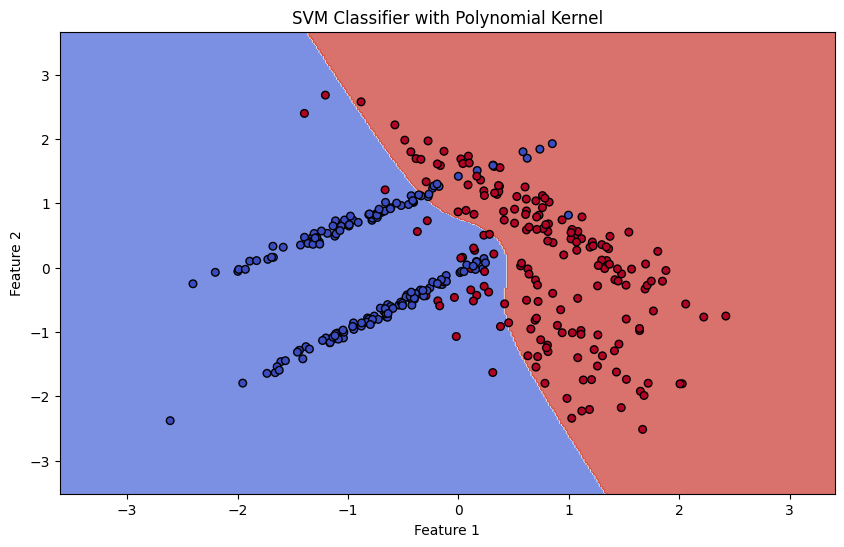

Accuracy on the test set: 0.87


In [9]:
#24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary .

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier with a Polynomial kernel
svm_classifier = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, ax=None, cmap=plt.cm.coolwarm):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.75, cmap=cmap)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=30, cmap=cmap)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('SVM Classifier with Polynomial Kernel')

# Create the plot
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, svm_classifier)
plt.show()

# Print the accuracy of the model
print(f"Accuracy on the test set: {svm_classifier.score(X_test, y_test):.2f}")


In [10]:
#25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gaussian Naïve Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the Gaussian Naïve Bayes model: {accuracy * 100:.2f}%")


Accuracy of the Gaussian Naïve Bayes model: 97.37%


In [11]:
#26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 Newsgroups dataset (for training)
newsgroups = fetch_20newsgroups(subset='train')
X = newsgroups.data  # Text data
y = newsgroups.target  # Target labels (newsgroup categories)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create the Multinomial Naïve Bayes model
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test_tfidf)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the Multinomial Naïve Bayes model: {accuracy * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy of the Multinomial Naïve Bayes model: 86.08%

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.89      0.92      0.90        97
           comp.graphics       0.75      0.83      0.79       104
 comp.os.ms-windows.misc       0.82      0.77      0.79       115
comp.sys.ibm.pc.hardware       0.67      0.76      0.71       123
   comp.sys.mac.hardware       0.88      0.79      0.83       126
          comp.windows.x       0.82      0.92      0.86       106
            misc.forsale       0.78      0.85      0.81       109
               rec.autos       0.89      0.89      0.89       139
         rec.motorcycles       0.89      0.89      0.89       122
      rec.sport.baseball       0.88      0.95      0.92       102
        rec.sport.hockey       0.93      0.94      0.93       108
               sci.crypt       1.00      0.95      0.98       125
         sci.electronics       0.88      0.79      0.83       1

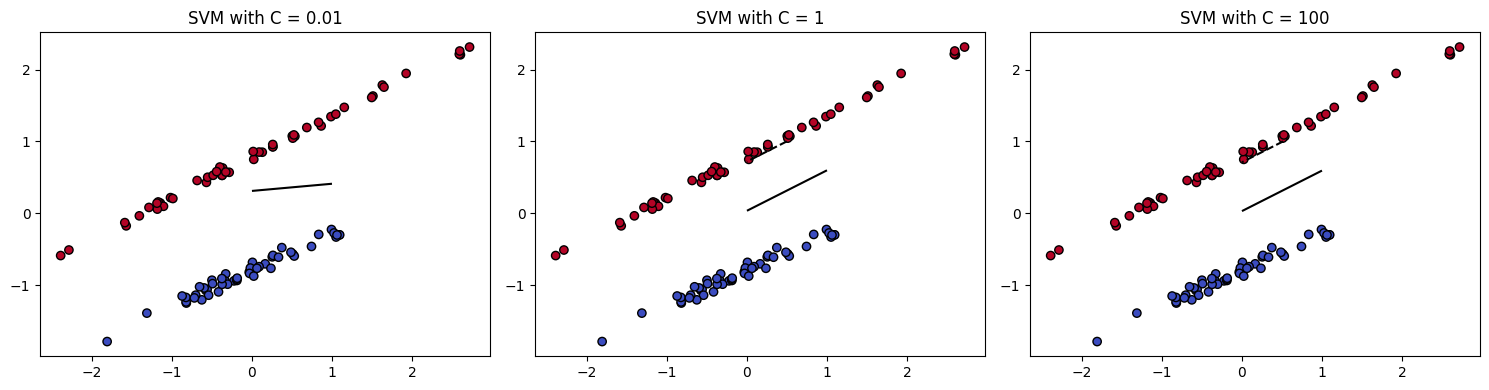

In [12]:
#27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate a simple 2D classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Different C values to try
C_values = [0.01, 1, 100]

# Plot decision boundaries
plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values):
    # Create and train the SVM model
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Plotting
    plt.subplot(1, len(C_values), i+1)
    plt.title(f"SVM with C = {C}")

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

plt.tight_layout()
plt.show()


In [13]:
#28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=0, n_classes=2, random_state=42)

# Step 2: Binarize the features (convert to 0/1)
binarizer = Binarizer(threshold=0.0)  # Convert positive values to 1, others to 0
X_binary = binarizer.fit_transform(X)

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Step 4: Train a Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = bnb.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.76

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       101
           1       0.76      0.75      0.75        99

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [14]:
#29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train SVM without scaling
svm_unscaled = SVC(kernel='rbf')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train SVM with scaling
svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Step 6: Compare results
print(f"Accuracy without feature scaling: {accuracy_unscaled:.2f}")
print(f"Accuracy with feature scaling:    {accuracy_scaled:.2f}")


Accuracy without feature scaling: 0.95
Accuracy with feature scaling:    0.98


In [15]:
#30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
categories = ['sci.space', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Step 2: Convert text to term frequency vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train without Laplace smoothing (alpha=0)
model_no_smoothing = MultinomialNB(alpha=0.0)
model_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = model_no_smoothing.predict(X_test)
acc_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# Step 5: Train with Laplace smoothing (alpha=1.0)
model_with_smoothing = MultinomialNB(alpha=1.0)
model_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = model_with_smoothing.predict(X_test)
acc_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

# Step 6: Compare results
print(f"Accuracy without Laplace smoothing (alpha=0): {acc_no_smoothing:.2f}")
print(f"Accuracy with Laplace smoothing (alpha=1):    {acc_with_smoothing:.2f}")


Accuracy without Laplace smoothing (alpha=0): 0.56
Accuracy with Laplace smoothing (alpha=1):    0.99


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


In [16]:
#31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly']
}

# Step 4: Create SVM model
svm = SVC()

# Step 5: Apply GridSearchCV
grid = GridSearchCV(svm, param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train, y_train)

# Step 6: Output best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("\nClassification Report on Test Data:")
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
#32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Step 1: Create an imbalanced binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM without class weights
svm_no_weights = SVC(kernel='rbf', C=1.0)
svm_no_weights.fit(X_train, y_train)
y_pred_no_weights = svm_no_weights.predict(X_test)

# Step 4: Train SVM with class weights
svm_with_weights = SVC(kernel='rbf', C=1.0, class_weight='balanced')
svm_with_weights.fit(X_train, y_train)
y_pred_with_weights = svm_with_weights.predict(X_test)

# Step 5: Evaluate and compare
print("=== Without Class Weight ===")
print("Accuracy:", accuracy_score(y_test, y_pred_no_weights))
print(classification_report(y_test, y_pred_no_weights))

print("=== With Class Weight (Balanced) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_with_weights))
print(classification_report(y_test, y_pred_with_weights))


=== Without Class Weight ===
Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       276
           1       1.00      0.83      0.91        24

    accuracy                           0.99       300
   macro avg       0.99      0.92      0.95       300
weighted avg       0.99      0.99      0.99       300

=== With Class Weight (Balanced) ===
Accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       276
           1       0.83      0.83      0.83        24

    accuracy                           0.97       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.97      0.97      0.97       300



In [21]:
#33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

import pandas as pd
import os
import urllib.request

# URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Directory to store the dataset
dataset_dir = "datasets"
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# File path to save the dataset
dataset_zip_path = os.path.join(dataset_dir, "smsspamcollection.zip")
dataset_file_path = os.path.join(dataset_dir, "SMSSpamCollection")

# Check if the dataset is already downloaded
if not os.path.exists(dataset_file_path):
    print("Dataset not found, downloading now...")
    urllib.request.urlretrieve(url, dataset_zip_path)

    # Unzip the file
    import zipfile
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)

# Step 1: Load the dataset
df = pd.read_csv(dataset_file_path, sep='\t', header=None, names=['label', 'message'])

# Step 2: Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 3: Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Step 4: Convert text data to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Train the Multinomial Naïve Bayes classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 6: Predict and evaluate
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Email Spam Detection:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))




Dataset not found, downloading now...
Accuracy on Email Spam Detection: 0.97847533632287

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
#34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import os
import urllib.request
import zipfile

# URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Directory to store the dataset
dataset_dir = "datasets"
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# File path to save the dataset
dataset_zip_path = os.path.join(dataset_dir, "smsspamcollection.zip")
dataset_file_path = os.path.join(dataset_dir, "SMSSpamCollection")

# Check if the dataset is already downloaded
if not os.path.exists(dataset_file_path):
    print("Dataset not found, downloading now...")
    urllib.request.urlretrieve(url, dataset_zip_path)

    # Unzip the file
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)

# Step 1: Load the dataset
df = pd.read_csv(dataset_file_path, sep='\t', header=None, names=['label', 'message'])

# Step 2: Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Step 4: Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Train SVM Classifier
svm_model = SVC(kernel='linear')  # Using a linear kernel
svm_model.fit(X_train_tfidf, y_train)

# Step 6: Train Naïve Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Step 7: Predict and evaluate SVM model
svm_pred = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Step 8: Predict and evaluate Naïve Bayes model
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)

# Step 9: Display the results
print("SVM Classifier Accuracy: {:.2f}%".format(svm_accuracy * 100))
print("Naïve Bayes Classifier Accuracy: {:.2f}%".format(nb_accuracy * 100))

print("\nSVM Classifier Classification Report:")
print(classification_report(y_test, svm_pred, target_names=["Ham", "Spam"]))

print("\nNaïve Bayes Classifier Classification Report:")
print(classification_report(y_test, nb_pred, target_names=["Ham", "Spam"]))


SVM Classifier Accuracy: 99.19%
Naïve Bayes Classifier Accuracy: 97.85%

SVM Classifier Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       966
        Spam       0.99      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


Naïve Bayes Classifier Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [23]:
#35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2
import os
import urllib.request
import zipfile

# URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Directory to store the dataset
dataset_dir = "datasets"
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# File path to save the dataset
dataset_zip_path = os.path.join(dataset_dir, "smsspamcollection.zip")
dataset_file_path = os.path.join(dataset_dir, "SMSSpamCollection")

# Check if the dataset is already downloaded
if not os.path.exists(dataset_file_path):
    print("Dataset not found, downloading now...")
    urllib.request.urlretrieve(url, dataset_zip_path)

    # Unzip the file
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)

# Step 1: Load the dataset
df = pd.read_csv(dataset_file_path, sep='\t', header=None, names=['label', 'message'])

# Step 2: Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Step 4: Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Train Naïve Bayes Classifier without feature selection
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Step 6: Evaluate Naïve Bayes model without feature selection
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)

# Step 7: Apply feature selection using SelectKBest with Chi-Square test
k_best = SelectKBest(chi2, k=1000)  # Select the top 1000 features
X_train_tfidf_kbest = k_best.fit_transform(X_train_tfidf, y_train)
X_test_tfidf_kbest = k_best.transform(X_test_tfidf)

# Step 8: Train Naïve Bayes Classifier with feature selection
nb_model_kbest = MultinomialNB()
nb_model_kbest.fit(X_train_tfidf_kbest, y_train)

# Step 9: Evaluate Naïve Bayes model with feature selection
nb_pred_kbest = nb_model_kbest.predict(X_test_tfidf_kbest)
nb_accuracy_kbest = accuracy_score(y_test, nb_pred_kbest)

# Step 10: Display the results
print("Naïve Bayes Classifier Accuracy (without feature selection): {:.2f}%".format(nb_accuracy * 100))
print("\nNaïve Bayes Classifier Accuracy (with feature selection): {:.2f}%".format(nb_accuracy_kbest * 100))

print("\nNaïve Bayes Classifier Classification Report (without feature selection):")
print(classification_report(y_test, nb_pred, target_names=["Ham", "Spam"]))

print("\nNaïve Bayes Classifier Classification Report (with feature selection):")
print(classification_report(y_test, nb_pred_kbest, target_names=["Ham", "Spam"]))


Naïve Bayes Classifier Accuracy (without feature selection): 97.85%

Naïve Bayes Classifier Accuracy (with feature selection): 95.61%

Naïve Bayes Classifier Classification Report (without feature selection):
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Naïve Bayes Classifier Classification Report (with feature selection):
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.98       966
        Spam       1.00      0.67      0.80       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [24]:
#36.  Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM Classifier with One-vs-Rest strategy
svm_ovr = SVC(decision_function_shape='ovr', kernel='linear')
svm_ovr.fit(X_train, y_train)

# Step 4: Predict on the test data using One-vs-Rest strategy
y_pred_ovr = svm_ovr.predict(X_test)

# Step 5: Train the SVM Classifier with One-vs-One strategy
svm_ovo = SVC(decision_function_shape='ovo', kernel='linear')
svm_ovo.fit(X_train, y_train)

# Step 6: Predict on the test data using One-vs-One strategy
y_pred_ovo = svm_ovo.predict(X_test)

# Step 7: Evaluate the accuracy for both models
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

# Step 8: Print the results
print(f"Accuracy of SVM with One-vs-Rest strategy: {accuracy_ovr * 100:.2f}%")
print(f"Accuracy of SVM with One-vs-One strategy: {accuracy_ovo * 100:.2f}%")


Accuracy of SVM with One-vs-Rest strategy: 100.00%
Accuracy of SVM with One-vs-One strategy: 100.00%


In [25]:
#37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM Classifier with a Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Step 4: Predict and evaluate accuracy with Linear kernel
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Step 5: Train the SVM Classifier with a Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # degree=3 for cubic polynomial kernel
svm_poly.fit(X_train, y_train)

# Step 6: Predict and evaluate accuracy with Polynomial kernel
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Step 7: Train the SVM Classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Step 8: Predict and evaluate accuracy with RBF kernel
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Step 9: Print the results for comparison
print(f"Accuracy of SVM with Linear kernel: {accuracy_linear * 100:.2f}%")
print(f"Accuracy of SVM with Polynomial kernel: {accuracy_poly * 100:.2f}%")
print(f"Accuracy of SVM with RBF kernel: {accuracy_rbf * 100:.2f}%")


Accuracy of SVM with Linear kernel: 95.61%
Accuracy of SVM with Polynomial kernel: 94.74%
Accuracy of SVM with RBF kernel: 94.74%


In [26]:
#38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 2: Initialize Stratified K-Fold Cross-Validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# List to store the accuracy for each fold
accuracies = []

# Step 3: Perform Stratified K-Fold Cross-Validation
for train_index, test_index in k_fold.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Step 4: Train an SVM Classifier with a Linear Kernel
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)

    # Step 5: Predict and evaluate accuracy for this fold
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    accuracies.append(accuracy)

# Step 6: Compute the average accuracy across all folds
average_accuracy = np.mean(accuracies)

# Step 7: Print the results
print(f"Accuracy for each fold: {accuracies}")
print(f"Average accuracy: {average_accuracy * 100:.2f}%")


Accuracy for each fold: [0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9646017699115044]
Average accuracy: 94.73%


In [27]:
#39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train and evaluate Naïve Bayes classifier with different priors

# Define different prior probabilities (uniform, custom priors)
prior_options = [
    None,  # No priors (uniform priors)
    [0.7, 0.3],  # Custom priors (adjusted for class 0 and class 1)
    [0.4, 0.6],  # Custom priors (adjusted for class 0 and class 1)
]

accuracies = []

# Train the model for each set of prior probabilities
for prior in prior_options:
    # Initialize Gaussian Naïve Bayes classifier with given priors
    model = GaussianNB(priors=prior)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy
    accuracies.append(accuracy)

# Step 4: Compare the performance
print("Accuracy for different prior probabilities:")
for i, prior in enumerate(prior_options):
    print(f"Prior {prior}: {accuracies[i]*100:.2f}%")


Accuracy for different prior probabilities:
Prior None: 94.15%
Prior [0.7, 0.3]: 93.57%
Prior [0.4, 0.6]: 94.15%


In [28]:
#40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Step 1: Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM Classifier without feature selection (using all features)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_no_rfe = svm.predict(X_test)
accuracy_no_rfe = accuracy_score(y_test, y_pred_no_rfe)
print(f"Accuracy without RFE: {accuracy_no_rfe * 100:.2f}%")

# Step 4: Perform Recursive Feature Elimination (RFE)
rfe = RFE(svm, n_features_to_select=10)  # Choose 10 features (you can adjust this number)
rfe.fit(X_train, y_train)

# Step 5: Train the SVM Classifier with the selected features from RFE
X_train_rfe = rfe.transform(X_train)  # Select the top features
X_test_rfe = rfe.transform(X_test)    # Select the top features

svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train)

# Predict and evaluate accuracy
y_pred_rfe = svm_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy with RFE: {accuracy_rfe * 100:.2f}%")


Accuracy without RFE: 96.49%
Accuracy with RFE: 92.98%


In [29]:
#41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an SVM Classifier with a Linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Step 4: Predict the labels for the test set
y_pred = svm.predict(X_test)

# Step 5: Evaluate the performance using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 6: Print the results
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Precision: 96.36%
Recall: 98.15%
F1-Score: 97.25%


In [34]:
#42.Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Step 1: Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Naïve Bayes classifier (GaussianNB)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Step 4: Predict the probabilities for the test set
y_pred_prob = nb_classifier.predict_proba(X_test)

# Step 5: Calculate the Log Loss (Cross-Entropy Loss)
log_loss_value = log_loss(y_test, y_pred_prob)

# Step 6: Print the Log Loss value
print(f"Log Loss (Cross-Entropy Loss): {log_loss_value:.4f}")


Log Loss (Cross-Entropy Loss): 0.4899


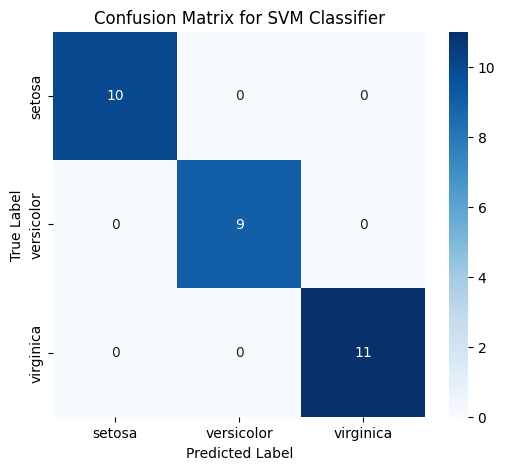

In [35]:
#43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM Classifier (using a linear kernel for simplicity)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Step 5: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 6: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [36]:
#44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Step 1: Load the California Housing dataset (you can use any regression dataset)
california_housing = fetch_california_housing()

# Features and target variables
X = california_housing.data
y = california_housing.target

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (important for SVM-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train the SVM Regressor model with an RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Step 6: Evaluate the model's performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Step 7: Print the MAE result
print(f"Mean Absolute Error of the SVR model: {mae:.2f}")


Mean Absolute Error of the SVR model: 0.40


In [37]:
#45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelBinarizer

# Step 1: Load the Breast Cancer dataset (or any binary classification dataset)
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 = malignant, 1 = benign)

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Naïve Bayes classifier (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Step 5: Compute the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Step 6: Print the ROC-AUC score
print(f"ROC-AUC Score of the Naïve Bayes model: {roc_auc:.2f}")


ROC-AUC Score of the Naïve Bayes model: 1.00


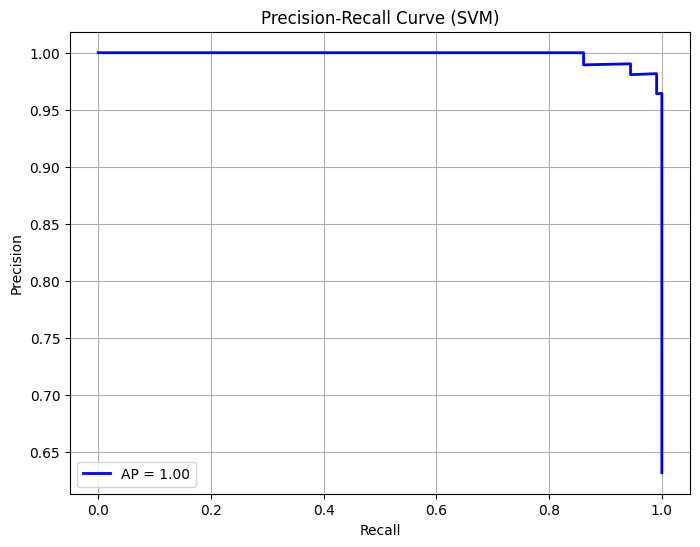

In [38]:
#46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Step 1: Load a binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM classifier with probability estimates
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Step 5: Get predicted probabilities
y_scores = svm.predict_proba(X_test_scaled)[:, 1]

# Step 6: Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Step 7: Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend()
plt.grid(True)
plt.show()
